# First digit analysis

This notebook aim to develop an analysis of the first digit based on the article 
https://towardsdatascience.com/what-is-benfords-law-and-why-is-it-important-for-data-science-312cb8b61048
for fraud detection

The outline for this notebook is as follows:

1. Preprocesing data
2. First digit analysis in numeric data
    1. First digit analysis in Prices
    2. First digit analysis in Quantities

## Preprocessing

In [2]:
import pandas as pd
import seaborn as sns

%matplotlib inline

df = pd.read_csv('../data/orders_report.csv')

# switch object to datetime for date columns 
df['Orders Completed Date'] = pd.to_datetime(df['Orders Completed Date'], format='%Y-%m-%d')

# switch object to float for numeric columns
df['Orders Payment Total'] = [float(s.replace(',','')) for s in df['Orders Payment Total']]

In [54]:
df.dtypes

Orders Completed Date        datetime64[ns]
Orders Email Hash                    object
Orders Number                        object
Variants SKU                         object
Products Name                        object
Line Items Quantity                   int64
Line Items Price                    float64
Material Categories Name             object
Material Groups Name                 object
Orders Payment Total                float64
Orders Currency                      object
Shipping Address ISO Name            object
Purchase Locations Method            object
dtype: object

# Prices

We start by analysing product prices

In [22]:
import math


In [4]:
prices = df['Line Items Price'].copy()

First, we need a function to get the first digit of a number. 

In [42]:
def get_first_digit(number):
    '''
    Gets the first digit of a number
    
    :return: Integer number
    '''
    #print(number)

    if number != 0:
        digits = int(math.log10(number))+1
    
        return int(number // 10 ** (digits -1) % 10)
    else:
        return 0

In [73]:
# Test
get_first_digit(495.05) 

#Should return 4 as it is the first digit in 495.05

4

Now, lets apply this function to our prices dataset

In [45]:
result = [get_first_digit(x) for x in prices]

prices_first_digit =pd.Series(result, index=prices.index)

Let's check that the function actually works in our dataset

In [53]:
pd.concat([prices, prices_first_digit], axis=1)

,Line Items Price,0
0,495.0,4
1,62.0,6
2,69.0,6
3,70.0,7
4,0.0,0
5,59.0,5
6,65.0,6
7,59.0,5
8,88.0,8
9,88.0,8


And now, let's plot the histogram

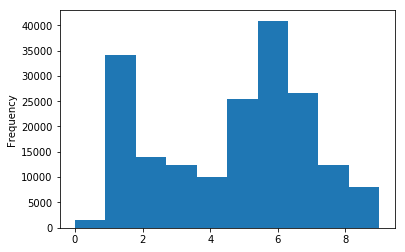

In [49]:
prices_first_digit.plot.hist()

Mhhh, that doesn't seem to reproduce the theory. However, there is a decreasing tendancy from firts digits 1 to 4, and from 6 to 8.

# Quantity

Let's try nown with quantities

In [55]:
quantities = df['Line Items Quantity'].copy()

In [56]:
result = [get_first_digit(x) for x in quantities]

quantities_first_digit = pd.Series(result, index=quantities.index)

In [66]:
quantities_first_digit.groupby(quantities_first_digit).count()

0         4
1    180119
2      4419
3       397
4       201
5        69
6        37
7        20
8        11
9         3
dtype: int64

Now we have a hit! Let's get a histogram in log scale.

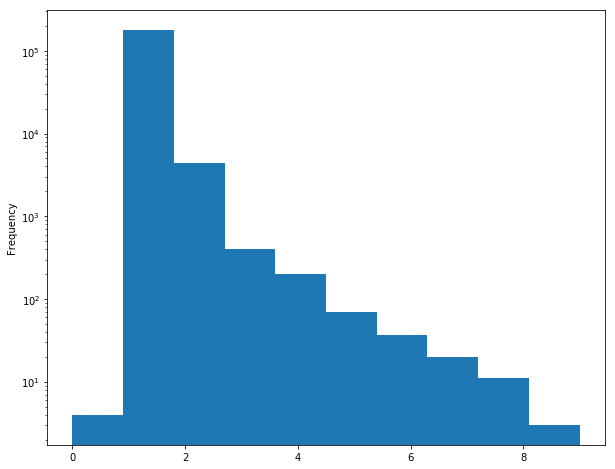

In [70]:
quantities_first_digit.plot.hist(figsize=(10,8), log=True)

# Conclusions

[Benford’s Law](https://en.wikipedia.org/wiki/Benford%27s_law) apply to the quantities dataset, but it doesn't strictly apply to the prices dataset. We could use it to search for anomaly detection in quantities in the future.